In [1]:
import numpy as np

In [2]:
print(2+3)

5


In [4]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

In [3]:
np.array(2)

array(2)

In [35]:
import sklearn

In [5]:
import yfinance as yf

In [6]:
import seaborn as sns

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt


In [9]:
import seaborn as sns


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stocks = input("Enter the code of stocks :")
data = yf.download(stocks, "2008-01-01","2021-01-18")

In [12]:
data.shape

(3282, 6)

In [13]:
pip install sklearn --user

Note: you may need to restart the kernel to use updated packages.


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3282 non-null   float64
 1   High       3282 non-null   float64
 2   Low        3282 non-null   float64
 3   Close      3282 non-null   float64
 4   Adj Close  3282 non-null   float64
 5   Volume     3282 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.5 KB


In [15]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,13.577000,459196.000000


Text(0.5, 1.0, 'NG=F Price Series')

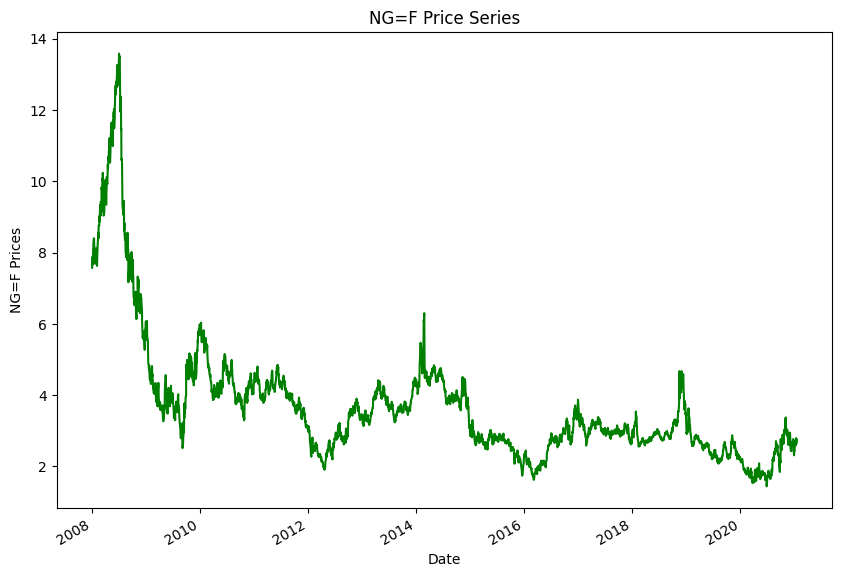

In [16]:
data.Open.plot(figsize = (10,7),color = 'g')
plt.ylabel(f"{stocks} Prices")
plt.title(f"{stocks} Price Series")

C:\Users\AJAYVIJAY\AppData\Local\Temp\ipykernel_5912\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<AxesSubplot: xlabel='Open', ylabel='Density'>

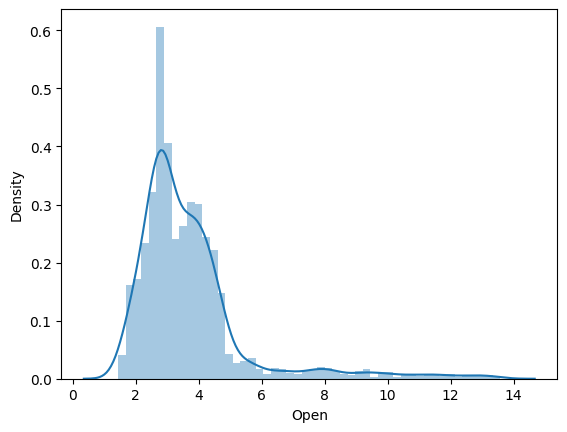

In [37]:
sns.distplot(data["Open"])

In [36]:
from sklearn.model_selection import train_test_split
x = data.drop("Close",axis=1)
y = data["Close"]

X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)




(2625, 5)
(657, 5)
(2625,)
(657,)


In [20]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lrfit = lr.fit(X_train,Y_train)
pred1 = lr.predict(X_test)

In [40]:
pred1

array([ 2.81200004,  5.8210001 ,  2.66199994,  5.98999977,  2.08299994,
       12.86100006,  3.98799992,  4.82200003,  1.78199995,  4.79500008,
        2.83999991,  3.55999994,  2.73699999,  2.96099997,  4.22700024,
        2.46300006,  4.12099981,  4.55999994,  8.96500015,  2.93899989,
        4.35500002,  2.67499995,  2.53500009,  2.33699989,  2.85299993,
        1.94400001,  2.75900006,  3.93799996,  3.30599999,  4.70499992,
        3.99099994,  2.69799995, 11.59799957,  4.24399996,  4.33699989,
        3.70700002,  3.49900007,  5.41599989,  3.65700006,  3.43600011,
        3.98399997,  2.43000007,  2.66700006,  2.57999992,  3.14199996,
        4.41300011,  4.2670002 ,  2.73399997,  3.90899992,  2.03900003,
        4.08300018,  2.47199988,  2.26900005,  3.94099998,  1.92700005,
        3.23000002,  3.72300005,  4.87300014,  4.36399984,  3.40300012,
        2.70000005,  3.88100004,  4.6789999 ,  3.13800001,  2.47000003,
        2.55200005,  4.35699987,  3.898     ,  2.46700001,  2.83

In [49]:
from sklearn.metrics import mean_squared_error , r2_score

def calculate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    r2_scores = r2_score(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"R2 Score = { r2_scores}")
    
calculate_metrics(Y_test,pred1)

MSE = 1.7128757764145352e-30
RMSE = 1.3087688017425137e-15
R2 Score = 1.0


In [56]:
from sklearn.linear_model import Lasso , Ridge

la = Lasso().fit(X_train,Y_train)
ri = Ridge().fit(X_train,Y_train)
la_p = la.predict(X_test)
ri_pred = ri.predict(X_test)

calculate_metrics(Y_test,la_p)
print(la_p)
print(la_p)

MSE = 0.23692336260532862
RMSE = 0.4867477402159445
R2 Score = 0.9132831519010187
[ 3.04855747  5.31198788  3.118879    5.44775576  2.35335749 10.04258263
  3.85642304  4.21863084  2.69647964  4.51794897  3.06845663  3.67546718
  3.05830869  3.05124627  4.30593574  2.79077594  3.99511868  4.47737197
  7.53425218  3.49011631  4.2082958   2.89158271  2.88018181  2.72301396
  3.02665758  2.10472894  2.97998272  3.91079335  3.21637033  4.57765545
  4.0125081   3.17426152  9.31026406  4.14157231  4.14197259  3.93662582
  3.56674968  4.85474309  3.76869833  3.43143432  3.70722429  2.87435982
  2.98686687  2.48367348  3.05177378  4.43855959  4.15135845  3.11194702
  3.96814806  2.39182246  4.21869643  2.73116319  2.77308446  3.73203304
  2.64879043  3.31762807  3.4707861   4.66238983  4.21426551  3.80617146
  3.02023234  4.09854226  4.58768934  3.2041298   2.47318895  2.62981441
  4.30200176  3.95716874  2.80134178  2.95311373  4.44260562  3.10365405
  3.71956374  4.05138386  6.94396303  3.73

In [61]:
import joblib
joblib.dump(lrfit,"model.pkl")
model = joblib.load("model.pkl")